
# Project: The TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
> There are a few questions to be answered with this dataset such as:

1. What are the relevant features in this dataset?
2. What irrelevant features need to be dropped?
3. The relationship between features?
4. Top 10 budgeted movies yearly
5. Top production companies
6. What are the genre of movies released?
7. What genres are more popular?
8. What is the rate of movies released monthly?
9. What are the rates of movies released 90s and the 20s?


In [112]:
#packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [113]:
#loading the data
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [114]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above output, it can be seen that the dataset has a total number of 10866 rows and 21 columns with some missing data in columns such as; genres, production_companies,overview, keywords,cast, tagline and homepage. And the data types are of three(3) types, int, float and strings

In [115]:
#statistical description of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


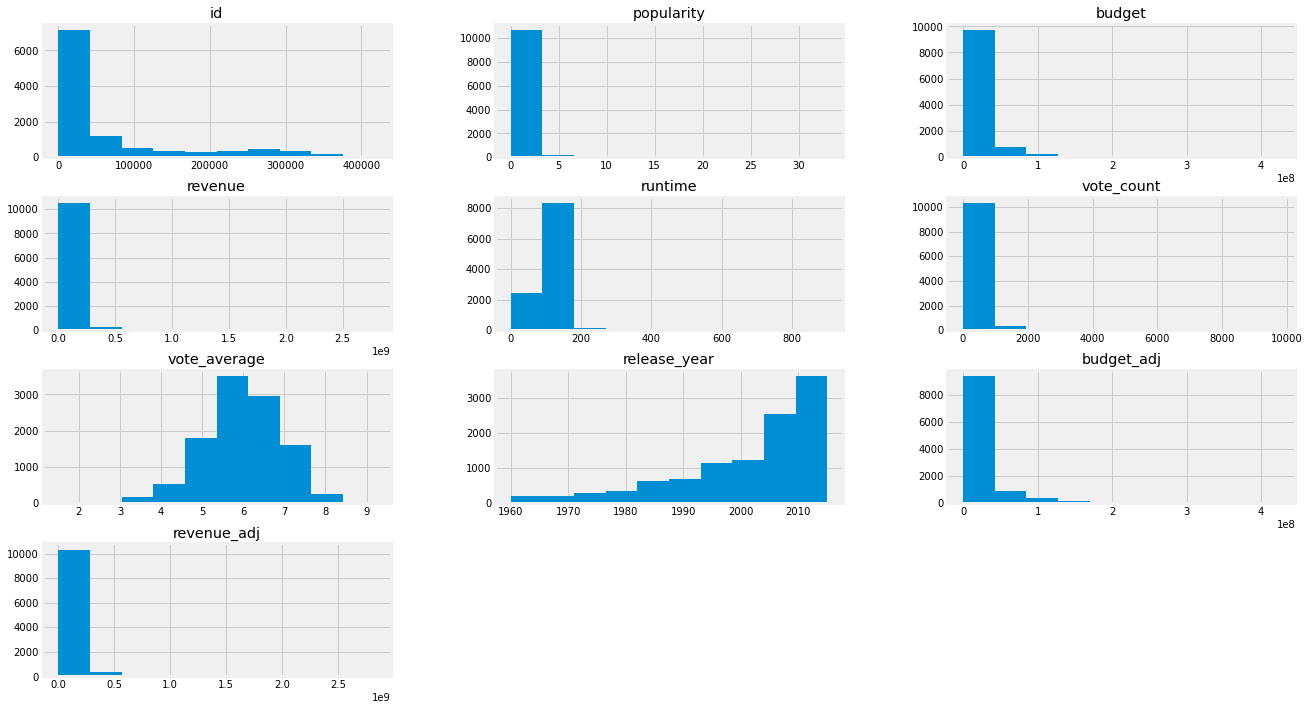

In [116]:
#histogram of the features
df.hist(figsize=(20,12));

In [117]:
df['homepage'].head()

0                        http://www.jurassicworld.com/
1                          http://www.madmaxmovie.com/
2       http://www.thedivergentseries.movie/#insurgent
3    http://www.starwars.com/films/star-wars-episod...
4                             http://www.furious7.com/
Name: homepage, dtype: object

In [118]:
df['keywords'].head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [119]:
df['original_title'].head()

0                  Jurassic World
1              Mad Max: Fury Road
2                       Insurgent
3    Star Wars: The Force Awakens
4                       Furious 7
Name: original_title, dtype: object

In [120]:
#count of movies released yearly
df['release_year'].value_counts().to_frame()

,release_year
2014,700
2013,659
2015,629
2012,588
2011,540
2009,533
2008,496
2010,490
2007,438
2006,408


In [121]:
#sum of null values in the data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [122]:
#sum of duplicated values
df.duplicated().sum()

1

In [123]:
#drop duplicate value(s)
df.drop_duplicates(inplace=True) 

In [124]:
#imdb_id column has null values, so let's try filling with the mode
df['imdb_id'].mode()[0]

'tt0035423'

In [125]:
df['imdb_id']=df['imdb_id'].fillna(df['imdb_id'].mode()[0])

In [126]:
df['imdb_id'].isnull().sum()

0

In [127]:
df['budget_adj'].head()

0    1.379999e+08
1    1.379999e+08
2    1.012000e+08
3    1.839999e+08
4    1.747999e+08
Name: budget_adj, dtype: float64

Checking for the correlation between "budget" and "budget_adj", also with "revenue" and "revenue_adj".

In [128]:
#there seems to be a little positive correlation between the two columns.                                                                                                                                                                                                                                                                                                                                                                                                                                        
df['budget'].corr(df['budget_adj'])

0.9689632821301754

In [129]:
df['revenue'].corr(df['revenue_adj'])

0.9191090109970169

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an i

### Movie Data Cleaning

In this section, I check for important features that are related to the questions i am trying to solve. 

In [130]:
#checking out the content of date column
df['release_date'].head()

0      6/9/15
1     5/13/15
2     3/18/15
3    12/15/15
4      4/1/15
Name: release_date, dtype: object

In [131]:
# Since the date column values were in string, I used the datetime method to convert to date values.
df['release_date']= pd.to_datetime(df['release_date'])

In [132]:
df['homepage'].head()

0                        http://www.jurassicworld.com/
1                          http://www.madmaxmovie.com/
2       http://www.thedivergentseries.movie/#insurgent
3    http://www.starwars.com/films/star-wars-episod...
4                             http://www.furious7.com/
Name: homepage, dtype: object

In [133]:
#These features seems not to be relevant, so I would be dropping them
df.drop(['tagline', 'keywords', 'homepage', 'imdb_id'], axis=1, inplace=True)

In [134]:
#updated shape of the data
df.shape

(10865, 17)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   overview              10861 non-null  object        
 8   runtime               10865 non-null  int64         
 9   genres                10842 non-null  object        
 10  production_companies  9835 non-null   object        
 11  release_date          10865 non-null  datetime64[ns]
 12  vote_count            10865 non-null  int64         
 13  vote_average    

In [136]:
df.dropna(inplace=True)

In [137]:
df.shape

(9772, 17)

<a id='eda'></a>
## Exploratory Data Analysis




### What is the correlation between the features?

<AxesSubplot:>

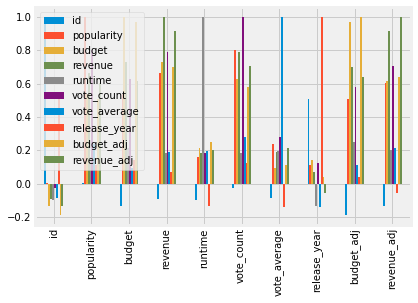

In [138]:
df.corr().plot(kind="bar")

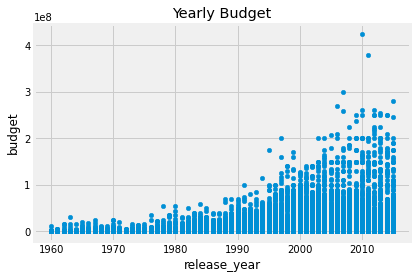

In [139]:
#scatter plot showing the correlation between release year and budget
df.plot(kind = 'scatter', x = 'release_year', y = 'budget', title="Yearly Budget")

plt.show()

The scatter plot above skewed towards the year 20's, which can be interepreted that more budget was made for movies released in the 20's than in the 90's

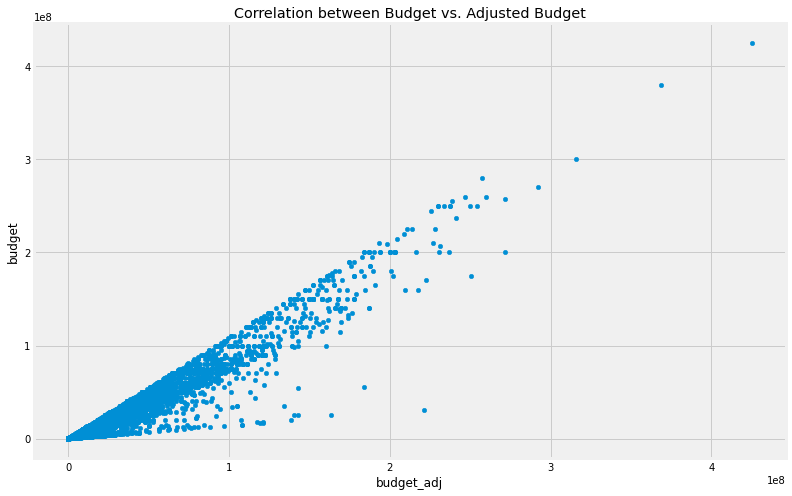

In [140]:
df.plot(kind = 'scatter', x = 'budget_adj', y = 'budget', figsize=(12,8), title= "Correlation between Budget vs. Adjusted Budget")

plt.show()

The above plot shows there is a positive correlation between adjusted budget and budget.

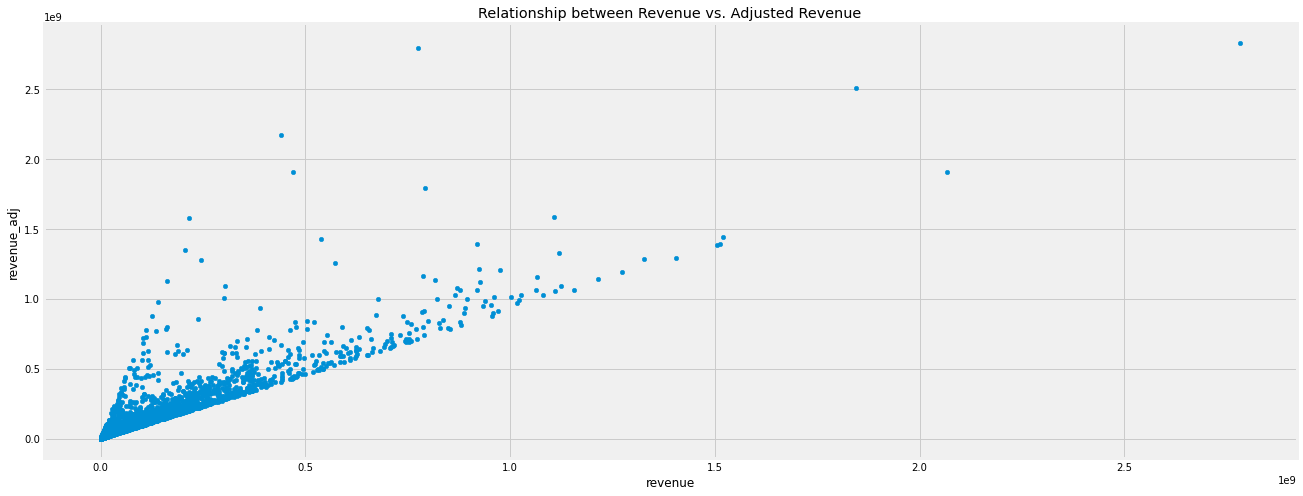

In [141]:
#scatter plot showing the correlation between revenue and revenue_adj
df.plot(kind = 'scatter', x = 'revenue', y = 'revenue_adj', title="Relationship between Revenue vs. Adjusted Revenue", figsize=(20,8))

plt.show()

The above plot shows there is a positive correlation between revenue and adjusted revenue.

### What is the average yearly budget of movies?

<AxesSubplot:xlabel='release_year'>

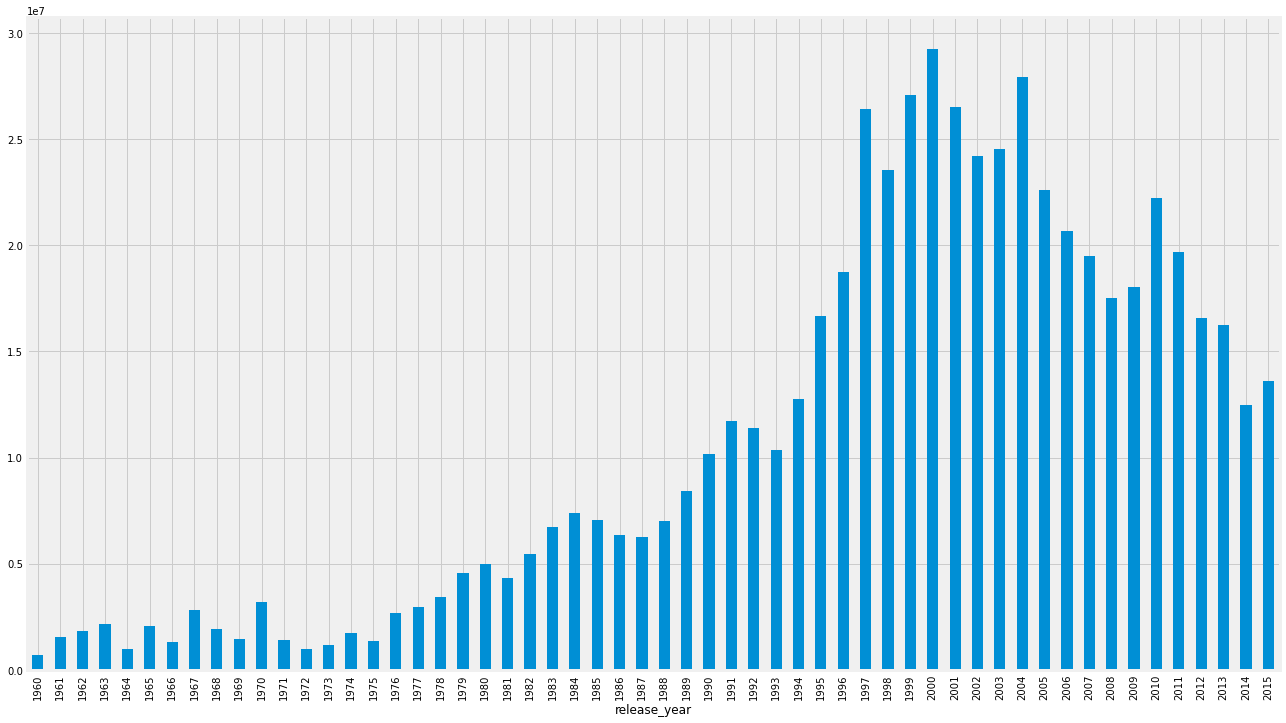

In [142]:
#bar plot showing the average yearly budget of movies
Avg_budget= df.groupby('release_year').budget.mean().plot(kind="bar", figsize=(20,12))
Avg_budget

### Top 10 budgeted movies yearly 

In [143]:
Top_budgeted_movies=df.groupby('release_year')['budget'].nlargest(10)
Top_budgeted_movies

release_year       
1960          10143     12000000
              10144      3000000
              10170      3000000
              10142      2000000
              10141       806948
                         ...    
2015          11       176000003
              9        175000000
              37       175000000
              19       160000000
              6        155000000
Name: budget, Length: 560, dtype: int64

In [144]:
Top_budgeted_movies.groupby(df['original_title'])

In [145]:
#Top budget movies
top_budget_movies=df['original_title'].groupby(df["budget"].nlargest(10))

<AxesSubplot:xlabel='budget,original_title'>

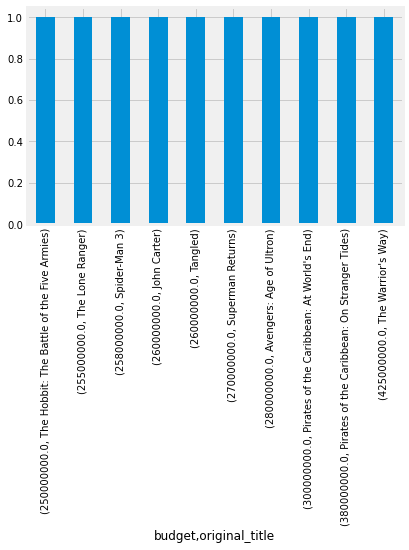

In [146]:
#bar plot showing top budgeted movies
top_budget_movies.value_counts().plot(kind="bar")


<AxesSubplot:title={'center':'Top 10 budget'}>

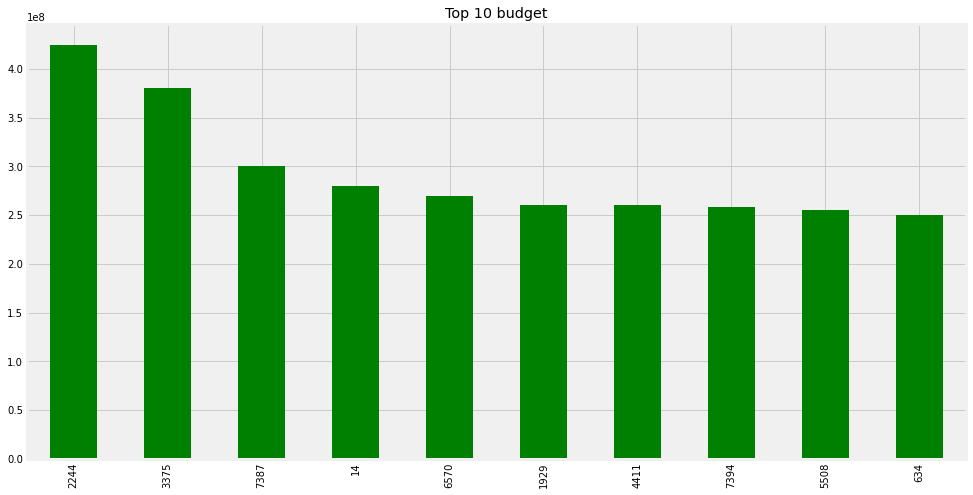

In [147]:
df["budget"].nlargest(10).plot(kind='bar', color='green', title="Top 10 budget" , figsize=(15,8))

In [148]:
df["budget"].mean()

16179667.921715105

In [149]:
df['revenue'].mean()

44231208.89357348

In [150]:
#creating a new dataframe to for months from the colum release year 
df['Month']= (df['release_date']).dt.month_name()
df['Month']

0            June
1             May
2           March
3        December
4           April
           ...   
10861        June
10862    December
10863     January
10864    November
10865    November
Name: Month, Length: 9772, dtype: object

### Top production companies?

<AxesSubplot:title={'center':'Top Production Companies'}>

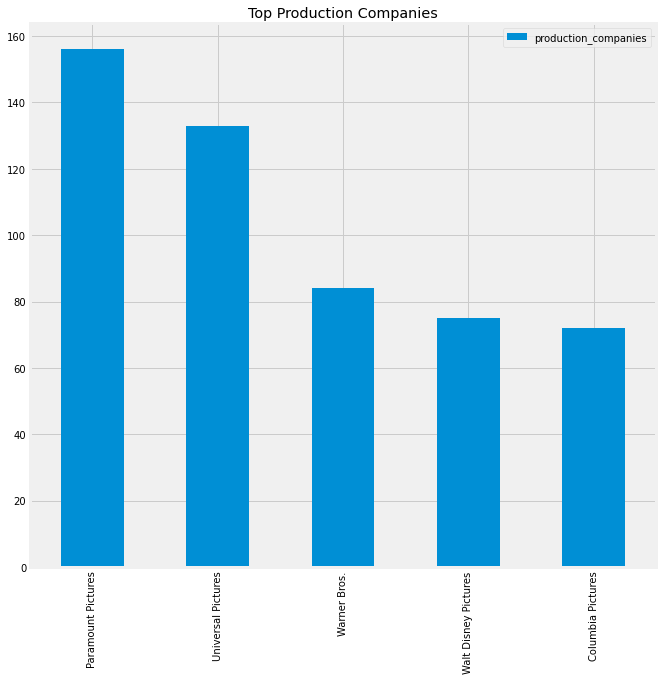

In [151]:
#Top 5 movie production companies
df['production_companies'].value_counts().to_frame()[:5].plot(kind='bar', title="Top Production Companies", figsize=(10,10))

It can be seen from the above plot that Paramount Pictures is the topmost production company.

In [152]:
#creating a new column for profit by separting budget from revenue
df['profit']=df['revenue']-df['budget']
df['profit'].head()

0    1363528810
1     228436354
2     185238201
3    1868178225
4    1316249360
Name: profit, dtype: int64

In [153]:
#Grouping movies by genres
df["original_title"].groupby(df["genres"])

<AxesSubplot:title={'center':'Profit against Budget'}, xlabel='budget', ylabel='profit'>

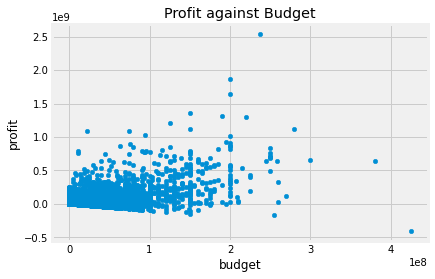

In [154]:
#scatter plot 
df.plot(kind="scatter", x="budget", y="profit", title="Profit against Budget")

<AxesSubplot:title={'center':'Profit against Budget'}, xlabel='revenue', ylabel='budget'>

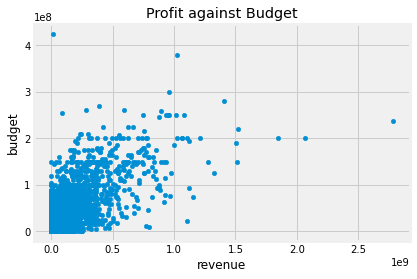

In [155]:
df.plot(kind="scatter", x="revenue", y="budget", title="Profit against Budget")

Text(0, 0.5, 'Duration')

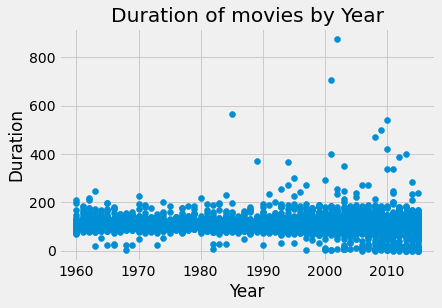

In [156]:
plt.style.use('fivethirtyeight')
plt.scatter(x=df['release_year'], y=df['runtime']);
plt.title("Duration of movies by Year")
plt.xlabel("Year")
plt.ylabel("Duration")

The above plot shows that most movies lasted below 200 minutes, with few above 200 and one movie lasted 800 minutes.

In [157]:
#max value of profit made
max_movie = df['profit'].max()
max_movie

2544505847

In [158]:
#min value of profit made
least_movie = df['profit'].min()
least_movie

-413912431

In [159]:
#movie with the highest vote
movie_votes = df.groupby('original_title', as_index=False) ['vote_count'].max()
movie_votes

,original_title,vote_count
0,$5 a Day,12
1,$9.99,18
2,'71,274
3,(500) Days of Summer,1778
4,(T)Raumschiff Surprise - Periode 1,80
...,...,...
9507,ìºì¹˜ë¯¸,13
9508,ì˜í˜•ì œ,10
9509,í¬í™” ì†ìœ¼ë¡œ,21
9510,í˜•ì‚¬ Duelist,10


In [160]:
highest_vote= movie_votes.nlargest(10, 'vote_count')

In [161]:
highest_vote.set_index('original_title', inplace=True)

<AxesSubplot:title={'center':'Highest votes for top movies'}, xlabel='original_title'>

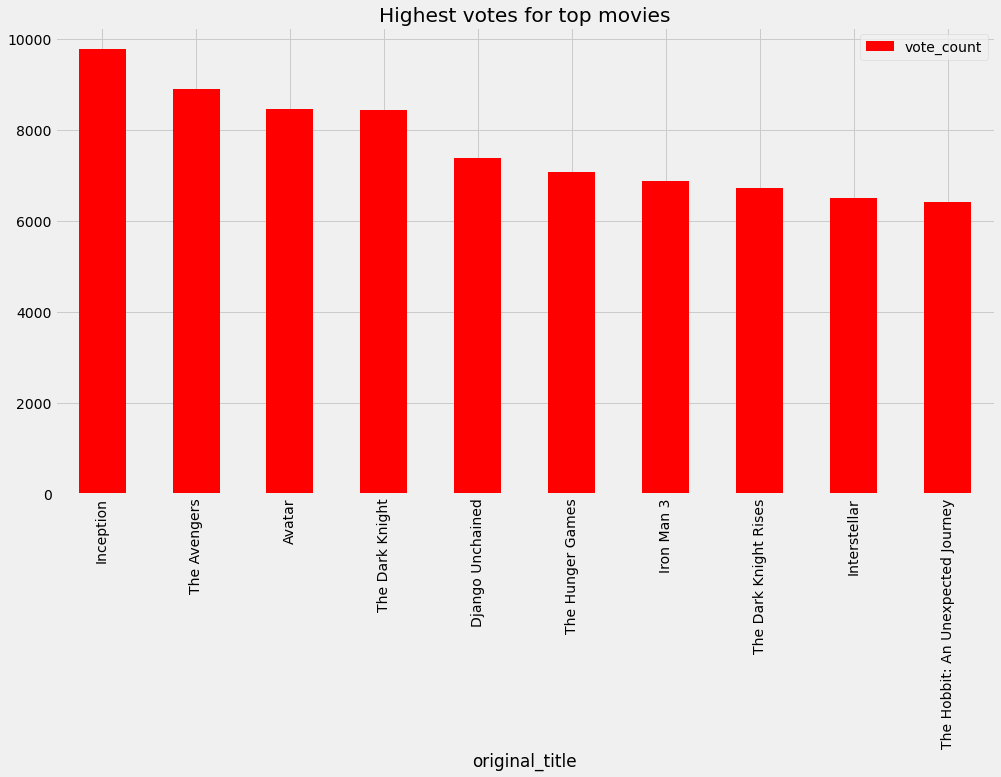

In [162]:
#Top Highly voted movies
highest_vote.plot(kind="bar", title='Highest votes for top movies', color='red',  figsize=(15,8))

### What are the genre of movies released?

In [163]:
df['genres'].value_counts()

Drama                              638
Comedy                             615
Drama|Romance                      272
Comedy|Drama                       255
Comedy|Romance                     248
                                  ... 
Music|Comedy|Crime                   1
Horror|Mystery|Fantasy|Thriller      1
Adventure|Thriller                   1
Drama|Mystery|Thriller|Fantasy       1
Drama|Comedy|Family|Foreign          1
Name: genres, Length: 1916, dtype: int64

In [164]:
#since there are movies with multiple class of genre, a copy needs to be created
movie_genre=df.copy()

In [165]:
movie_genre['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 9772, dtype: object

In [166]:
#split the classes of genres by the character "|"
movie_genre['genres']= df.genres.str.split('|')

In [167]:
movie_genre.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Month,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,1316249360


In [168]:
movies_df=movie_genre.explode('genres')

<AxesSubplot:title={'center':'Top Ten Genres '}>

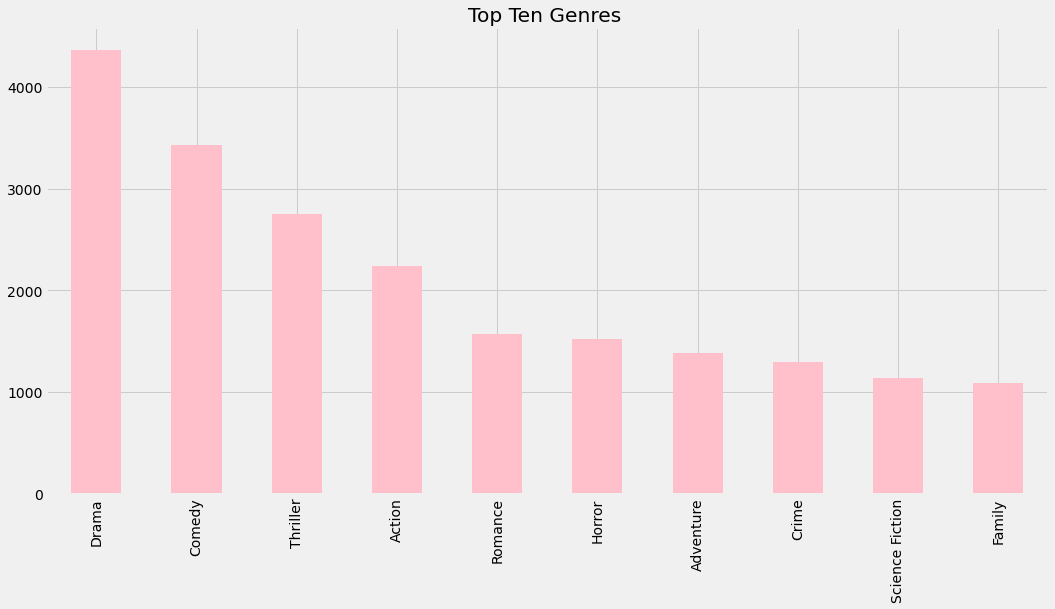

In [169]:
#Plot of top 10 genres
movies_df['genres'].value_counts().nlargest(10).plot(kind='bar', figsize=(16,8), color="pink", title="Top Ten Genres ")

In [170]:
#grouping movies based on their genres
Movie=movies_df.groupby('genres', as_index=False)['original_title']


In [171]:
#the list of movies in Drama genre
Movie.get_group('Drama').to_frame()

,original_title
5,The Revenant
7,The Martian
12,Ex Machina
15,The Hateful Eight
18,Cinderella
...,...
10851,Born Free
10854,The Chase
10856,The Ugly Dachshund
10859,Seconds


### What genres are more popular?

In [172]:
Popular_Genres= movies_df.groupby('genres').max()['popularity']
Popular_Genres.head()

genres
Action       32.985763
Adventure    32.985763
Animation     8.691294
Comedy        8.691294
Crime         9.335014
Name: popularity, dtype: float64

In [173]:
Popular_Genres.to_frame()

,popularity
genres,
Action,32.985763
Adventure,32.985763
Animation,8.691294
Comedy,8.691294
Crime,9.335014
Documentary,1.005772
Drama,24.949134
Family,8.691294
Fantasy,11.173104


<AxesSubplot:title={'center':'Top Genres based on Popularity'}, xlabel='genres'>

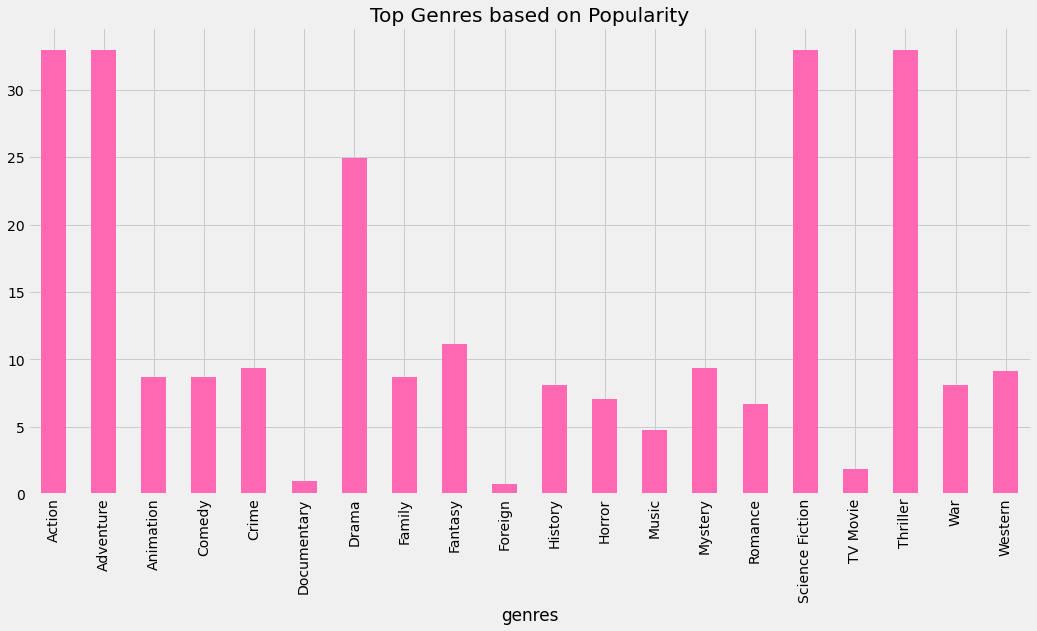

In [174]:
Popular_Genres.plot(kind="bar", title="Top Genres based on Popularity", color= "hotpink", figsize=(16,8))

In [175]:
#characteristics of top profited movie
top_profited_movie= df[df['profit'] == max_movie]
top_profited_movie

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Month,profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,December,2544505847


In [176]:
max_movie

2544505847

In [177]:
least_movie

-413912431

In [178]:
#characteristics of least profited movie
least_profited_movie= df[df['profit'] == least_movie]
least_profited_movie

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Month,profit
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000.0,11087569.0,December,-413912431


### What is the rate of movies released monthly?

<AxesSubplot:title={'center':'Rate of movies released monthly'}>

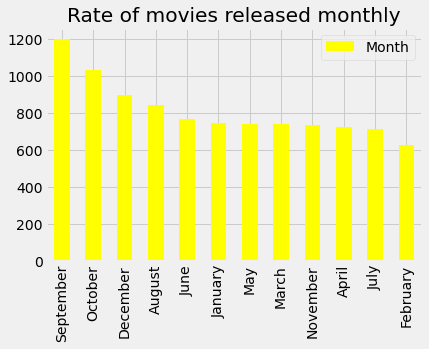

In [179]:
Monthly_release=df['Month'].value_counts().to_frame()
Monthly_release.plot(kind='bar', color='yellow', title="Rate of movies released monthly")

It can be seen from the above plot, that most movies were released in the month of September 

### What are the rates of movies released 90s and the 20s? 

In [180]:
#movies released between 1990 and 1999
ninetys= df.loc[(df['release_year'] > 1990) & (df['release_year'] <= 1999)] 
ninetys.value_counts().sum()

1546

<AxesSubplot:title={'center':'Movies produced between 1990-1999'}>

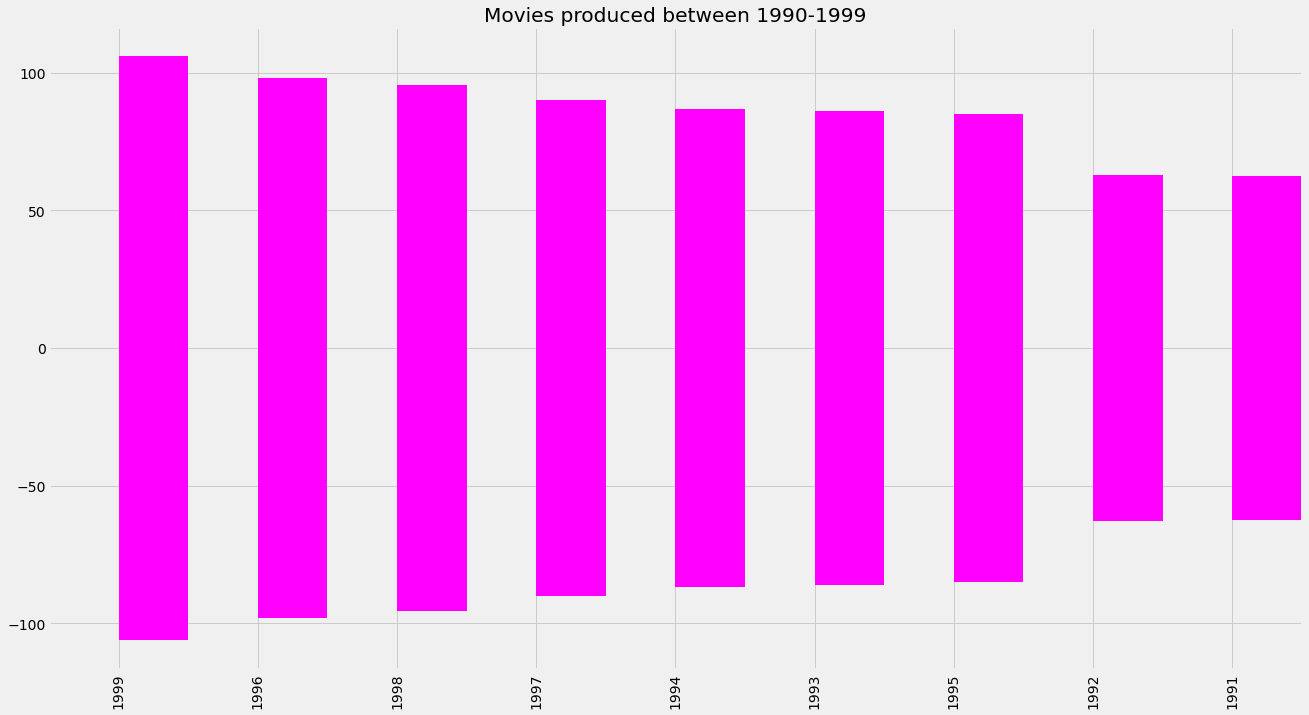

In [181]:
#bar plot showing movies released between 1990 to 1999
ninetys['release_year'].value_counts().plot( kind = 'bar',title = 'Movies produced between 1990-1999',color = 'magenta',orientation = 'horizontal',label = 'Release Year',figsize = (20,11))

In [182]:
#movies released between 1990 and 1999
twentys= df.loc[(df['release_year'] <= 2016) & (df['release_year'] >= 2000)] 
twentys.value_counts().sum()

6267

<AxesSubplot:title={'center':'Movies produced between 2000 and 2016'}>

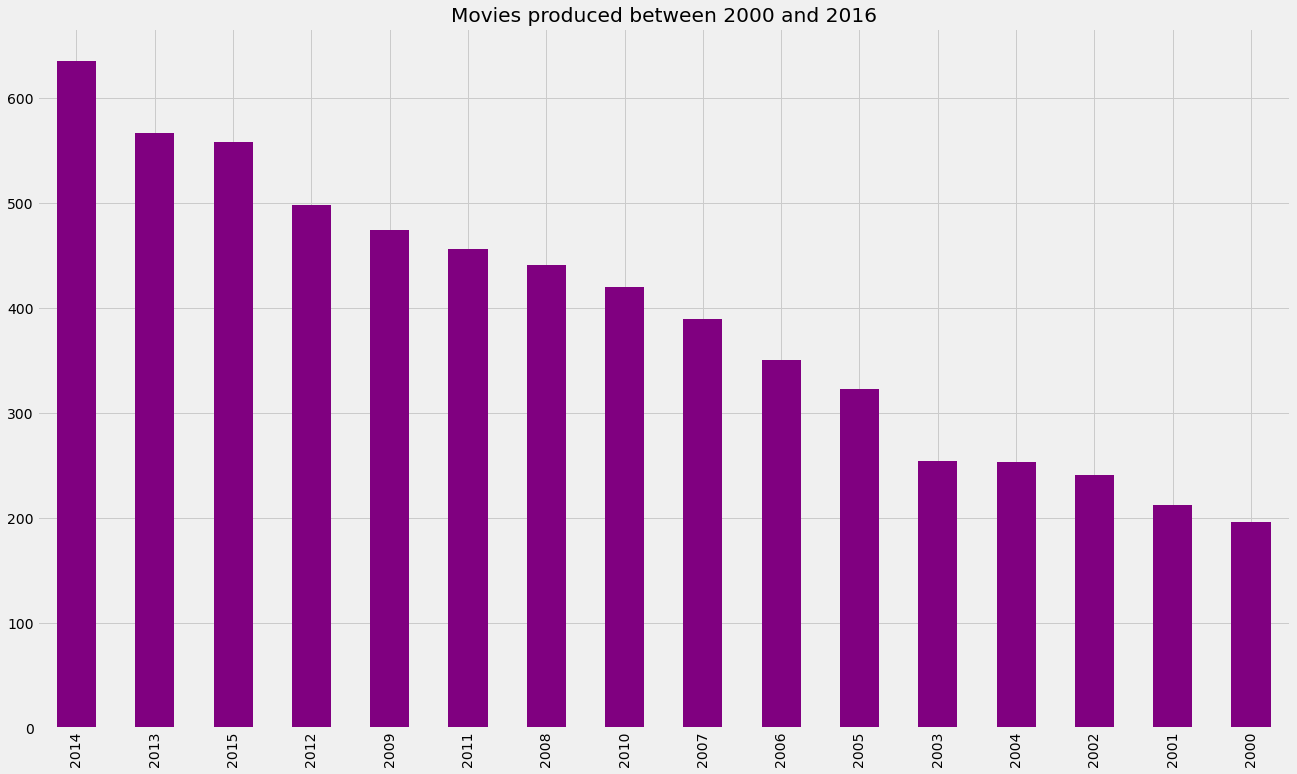

In [183]:
#bar plot showing movies released between 2000 to 2016
twentys['release_year'].value_counts().plot(kind='bar', title="Movies produced between 2000 and 2016", color='purple', figsize=(20,12))

<a id='conclusions'></a>
## Conclusions

From the above analysis, More movies were released in the 20th century, than the 19th century, with Adventure, Action, Sci-Fi, Thriller and Drama movies as the most popular genres.Drama genres produced the most movies, followed by Comedy genres.
 Based on vote_counts of the public,the movie with the highest votes was titled "Inception".
 In comparing budget against profit made from movies, the movie "The Warrior's way" was highly budgeted for, but made the least profit, no wonder, the correlation between budget and profit wasn't high.

Sites visited
https://matplotlib.org/stable/index.html ,
https://stackoverflow.com
